# Machine Learning With Python Project
**By Shivam Gandhi**

## Problem Statement

TechWorks Consulting is a recruitment firm which focus on creating and providng job opurtunities for it professionals based on the qualifacation.The firm wants to determine the salary of newly hired employees. To determine this we have to create a machine learning model from the given information.To determine the salary and create Machine Learning model we are provided with variables like college, Experience, Role, previous CTC and academic record.

## Approach to solve the problem

As a data scientist my role is to make a effective machine learning model and evaluate its performance and this can be done by undertaking some measures

1. **Data Analysis:** Analyze and understand the data and combine the datasets based on your understanding of the problem statement

   
3. **Data Preprocessing:**
   -> Convert categorical data like College" and City into numerical format.
   -> Handle missing values by imputation or removal, ensuring that data is complete.
   -> Create dummy variables for the nescessary columns like "Role"
   -> Detect and handle outliers to ennhance model's accuracy.

   
5. **Model Creation:** The objective is to perform a regression task and predict a continuous variable, specifically the salary of newly hired employees. Consider regression models like Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regression, Random Forest Regressor, XG Boost Regressor.s

## The available ML model options had to perform on this task

The considered regression models for predicting employee salaries are:

1. **Linear Regression:**- Linear regression is a simple model which depicts a linear relationship between dependant and independant variable
     
2. **Ridge Regression:**- To overcome overfitting and multicollinearity and add regularization by adding a penalty term, it is an ideal for handling issues.

3. **Lasso Regression:**- It is similar to ridge and Combats overfitting and provide regularization.
     

4. **Decision Tree Regression:** - It is a non-linear model that That can handle both numerical and categorical variables.
  
     

5. **Random Forest Regressor:**
   -A Random forest regression model combines multiple decision trees to create a single model. Each tree builds from a different subset of the data and makes its own independent prediction. The final prediction for input is based on the average or weighted average of all the individual trees' predictions.

6. **XG Boost Regressor:**- XGBoost is a robust machine-learning algorithm that can help you understand your data and make better decisions. XGBoost is an implementation of gradient-boosting decision trees

In [9]:
# importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Reading and loading CSV file into a DataFrame

df = pd.read_csv("ML case Study.csv", header=0)
df1 = pd.read_csv("cities.csv", header=0)
df2 = pd.read_csv("Colleges.csv", header=0)

#### Overview of all the data

In [12]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [13]:
df1.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [14]:
df2.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


### Data Preprocessing

In [16]:
# taking data from college dataframe and storing in different lists tier1,tier2,tier3

Tier1 = df2["Tier 1"].tolist()
Tier2 = df2["Tier 2"].tolist()
Tier3 = df2["Tier 3"].tolist()

In [17]:
# displaying a list

Tier3

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [18]:
pd.set_option('future.no_silent_downcasting', True)

In [19]:
# Converting categorical data into numerical
# Tier1=1,Tier2=2,Tier3=3

for item in df.College:
    if item in Tier1:
        df.replace(item,{'College':1},inplace=True)
    elif item in Tier2:
        df.replace(item,{'College':2},inplace=True)
    elif item in Tier3:
        df.replace(item,{'College':3},inplace=True)

In [20]:
# taking data from city dataframe and storing in different lists metro and non-metro

metro = df1['Metrio City'].tolist()
non_metro_cities = df1['non-metro cities'].tolist()

In [21]:
# converting into numerical and assigning value as 1 if city is merto and 0 if non metro

for item in df.City:
    if item in metro:
        df.replace(item,{'City':1},inplace=True)
    elif item in non_metro_cities:
        df.replace(item,{'City':0},inplace=True)

In [22]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


#### Creating Dummy Variables

In [24]:
# Converting Categorical column 'Role' into numerical using dummy variables

df = pd.get_dummies(df,columns=['Role'],drop_first=True)

In [25]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,True
1,2,0,57081.0,1,84,18,68005.87,False
2,3,0,60347.0,2,52,28,76764.02,False
3,3,0,49010.0,2,81,33,82092.39,False
4,1,0,57879.0,4,74,32,73878.10,False


In [26]:
#converting to int type 0's and 1's

df['Role_Manager']=df['Role_Manager'].astype(int)

In [27]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


### EDA and Handling missing values

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   int32  
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 93.2+ KB


In [30]:
df.isna().sum()

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role_Manager           0
dtype: int64

### Note: No missing values

In [32]:
# Statistical info about numerical data

df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


In [33]:
df.shape

(1589, 8)

## OUTLIER DETECTION AND TREATMENT

<Axes: xlabel='Previous CTC', ylabel='CTC'>

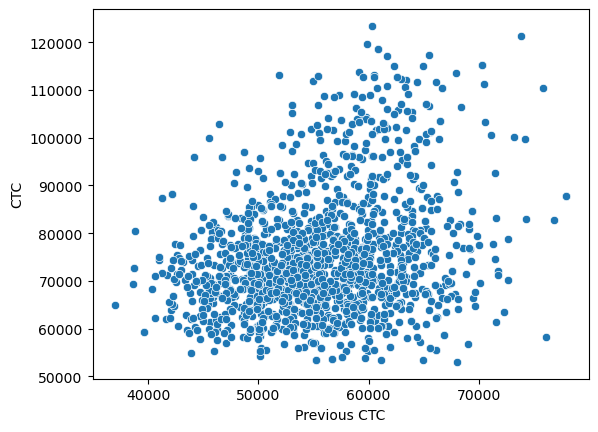

In [35]:
sns.scatterplot(x = df['Previous CTC'], y = df['CTC'])

<Axes: ylabel='Previous CTC'>

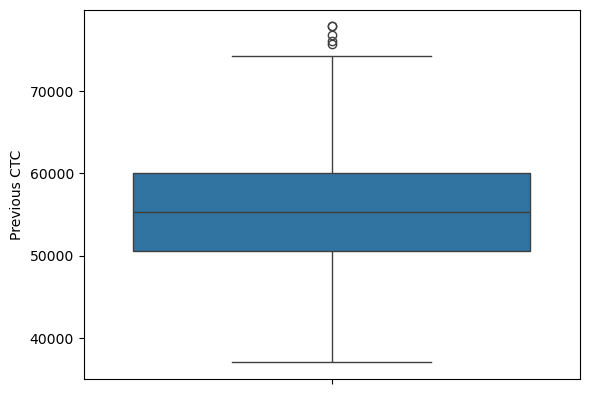

In [36]:
# Using seaborn library to plot box plot for detection of outliers
sns.boxplot(df['Previous CTC'])

<Axes: ylabel='CTC'>

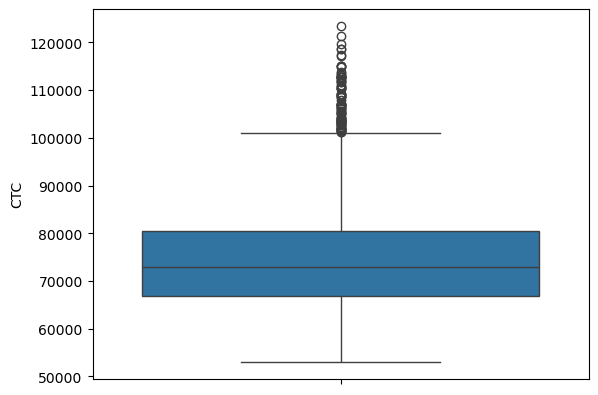

In [37]:
sns.boxplot(df['CTC'])

<Axes: xlabel='Graduation Marks', ylabel='CTC'>

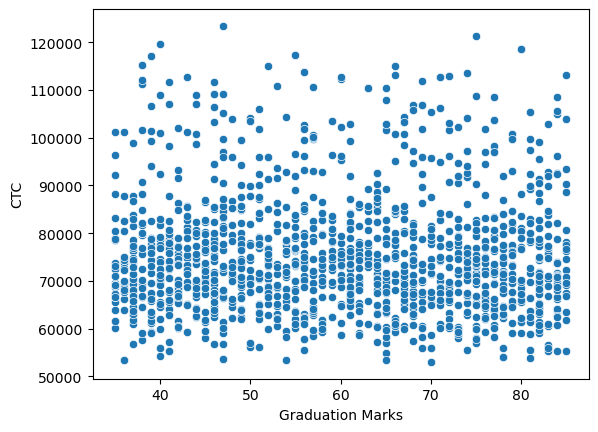

In [38]:
sns.scatterplot(x = df['Graduation Marks'], y= df['CTC'])

##### Capping and Flooring

In [40]:
# for previous ctc
uv=np.percentile(df['Previous CTC'],[99])[0]

In [41]:
np.percentile(df['Previous CTC'],[99])[0]

71506.92

In [42]:
df[(df['Previous CTC'])>uv]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
116,3,1,77911.0,1,50,58,87831.62,0
292,3,0,74198.0,1,57,25,99644.51,1
543,1,1,73856.0,1,75,54,121362.73,1
572,1,1,71543.0,4,82,30,61366.78,0
701,2,0,71549.0,4,47,50,83116.21,0
847,1,1,71756.0,4,67,23,72141.43,0
860,1,1,75785.0,4,63,37,110338.25,1
941,3,1,72319.0,1,51,50,63538.43,0
1024,1,1,72661.0,3,74,47,70238.70,0
1047,1,0,73214.0,4,57,22,100119.53,1


In [43]:
#replace values that is higher then upper limit

df.loc[df['Previous CTC'] > 3 * uv, 'Previous CTC'] = 3 * uv

In [44]:
# for CTC

np.percentile(df['CTC'], [99])[0]

112826.26

In [45]:
uv_ctc = np.percentile(df['CTC'], [99])[0]

In [46]:
df[(df['CTC'] > uv_ctc)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
34,1,0,60894.0,4,80,28,118651.89,1
185,2,0,70258.0,4,38,36,115126.75,1
254,2,1,51912.0,2,66,50,113141.14,1
328,3,0,62264.0,2,52,64,114996.23,1
543,1,1,73856.0,1,75,54,121362.73,1
577,3,1,59101.0,3,56,31,113843.16,1
668,1,1,60476.0,1,85,62,113212.07,1
883,3,1,64930.0,1,66,51,114939.65,1
1146,1,1,61709.0,4,39,60,117207.24,1
1230,2,0,60298.0,1,47,52,123416.99,1


In [47]:
#replace values that is higher then upper limit

df.loc[df['Previous CTC'] > 3 * uv_ctc, 'Previous CTC'] = 3 * uv_ctc

### Note : There is no outliers in this data which is affect the data much

## Correlation Matrix

In [50]:
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


### Preperation for creating Machine Learning Models

##### Importing Libraries

In [53]:
from sklearn.model_selection import train_test_split,validation_curve,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import preprocessing,tree
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
import pydotplus
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from xgboost import XGBRegressor

##### Defining Dependent and Independent Variable

In [55]:
# we are creating variables for multiple regressions

X = df.loc[:, df.columns != 'CTC']
y = df['CTC']

In [56]:
X.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523.0,3,66,19,1
1,2,0,57081.0,1,84,18,0
2,3,0,60347.0,2,52,28,0
3,3,0,49010.0,2,81,33,0
4,1,0,57879.0,4,74,32,0


In [57]:
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

##### Preperation of Train-Test (80-20 Split)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
X_train.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
1062,1,0,61410.0,4,83,59,1
215,1,1,59781.0,1,46,41,0
654,1,0,62521.0,1,70,59,0
55,1,0,66624.0,1,63,58,1
1187,3,0,54621.0,2,52,62,0


In [61]:
y_train.head()

1062    102928.71
215      76811.45
654      77733.27
55      110438.17
1187     74204.19
Name: CTC, dtype: float64

### Linear Regression

In [63]:
# Create a LinearRegression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

LinearRegression()

In [64]:
# Make predictions on the test data
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_pred_tr = linear_reg.predict(X_train)

# Calculate and print the R-squared (r2) score
print("R-Squared Score:",r2_score(y_test, linear_reg_pred))
print("R-Squared Score:",r2_score(y_train, linear_reg_pred_tr))

# Calculate and print the Mean Squared Error (MSE)
print("Mean Squared Error:", mean_squared_error(y_test, linear_reg_pred))


R-Squared Score: 0.5355989894790063
R-Squared Score: 0.5331293335456955
Mean Squared Error: 68909870.69952603


### Ridge Regression

In [66]:
#Scaling

scaler=preprocessing.StandardScaler().fit(X_train)
X_train_scaler=scaler.transform(X_train)
X_test_scaler=scaler.transform(X_test)


# Create a Ridge regression model
ridge_reg = Ridge(alpha=0.5)

# Fit the model to training data
ridge_reg.fit(X_train_scaler, y_train)

Ridge(alpha=0.5)

In [67]:
# Make prediction on test data
ridge_predict = ridge_reg.predict(X_test_scaler)

# Calculate and print the R-squared (r2) score
print("R-Squared Score:",r2_score(y_test, ridge_predict))


# Calculate and print the Mean Squared Error (MSE)
print("Mean Squared Error:", mean_squared_error(y_test, ridge_predict))

R-Squared Score: 0.5355848845406525
Mean Squared Error: 68911963.65250452


#### Ridge Regression with multiple hyperparameters

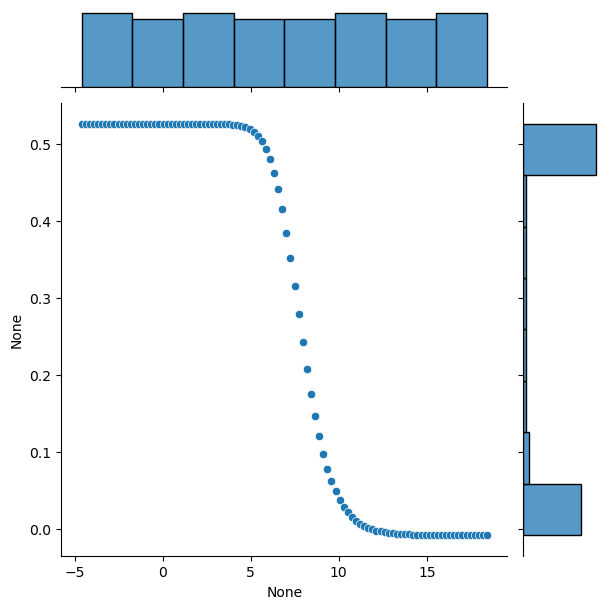

In [69]:
#defining alpha range
param_range=np.logspace(-2,8,100)

#validation curve
train_scores,test_scores=validation_curve(Ridge(),X_train_scaler,y_train,param_name='alpha',param_range=param_range,scoring='r2')

train_mean=np.mean(train_scores,axis=1)

test_mean=np.mean(test_scores,axis=1)

# Create a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range), y=test_mean)

In [70]:
# Find the highest alpha value
np.where(test_mean==max(test_mean))

# Train a Ridge regression model with the best alpha
lm_ridge = Ridge(alpha = param_range[30])
lm_ridge.fit(X_train_scaler, y_train)

Ridge(alpha=10.722672220103231)

In [71]:
# Predicting values for Ridge regression model with the best hyperparameters.
lm_ridge_pred = lm_ridge.predict(X_test_scaler)

# Calculate and print the R-squared (R2) scores.
print('R-squared Score: ',r2_score(y_test, lm_ridge_pred))

# Calculate and print the Mean Squared Error (MSE).
print('Mean Squared Error: ',mean_squared_error(y_test, lm_ridge_pred))

R-squared Score:  0.5352671332070207
Mean Squared Error:  68959112.99718533


### Lasso Regression

In [73]:
# Create Lasso regression with alpha value
lasso_reg = Lasso(alpha=0.5)


lasso_reg.fit(X_train_scaler, y_train)

Lasso(alpha=0.5)

In [74]:
# Make Prediction on test data
lasso_reg_pred = lasso_reg.predict(X_test_scaler)

# Calculate and print the R-squared (r2) score
print("R-Squared Score ",r2_score(y_test, lasso_reg_pred))

# Calculate and print the Mean Squared Error (MSE)
print("Mean Squared Error:", mean_squared_error(y_test, lasso_reg_pred))

R-Squared Score  0.5356055546226256
Mean Squared Error: 68908896.5345529


### Lasso Regresion With Hyperparameters

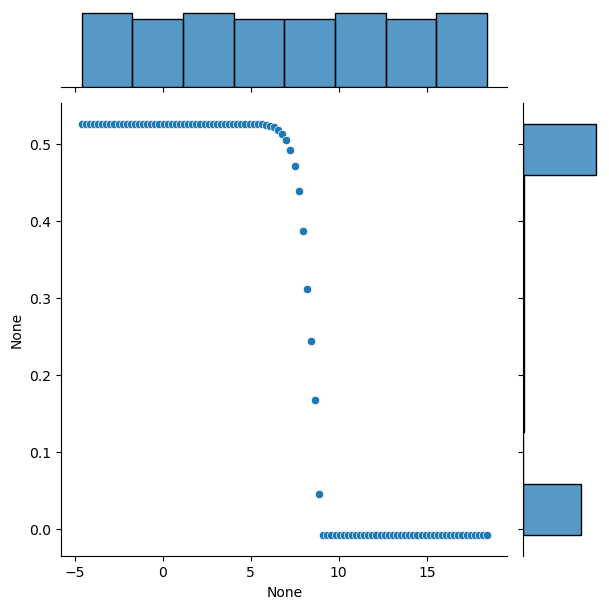

In [76]:
# Defining alpha range for Lasso regression
param_range_lasso = np.logspace(-2,8,100)

# Perform cross-validated validation curve to find the best alpha for Lasso regression
train_score_lasso, test_score_lasso = validation_curve(Lasso(), X_train_scaler, y_train, param_name="alpha", param_range = param_range_lasso, scoring='r2')

# Calculate  mean R-squared scores 
train_mean_lasso = np.mean(train_score_lasso, axis=1)
test_mean_lasso = np.mean(test_score_lasso, axis=1)

#Create a joint plot to visualize the relationship between log(alpha) and R-squared
sns.jointplot(x=np.log(param_range_lasso), y=test_mean_lasso)

In [77]:
# highest alpha value
np.where(test_mean_lasso==max(test_mean_lasso))

# Train a Lasso regression model with the best alpha
lm_lasso_best = Lasso(alpha = param_range_lasso[30])
lm_lasso_best.fit(X_train_scaler, y_train)

Lasso(alpha=10.722672220103231)

In [78]:
# Predicting values for Lasso regression model with the best hyperparameters.
lm_lasso = lm_lasso_best.predict(X_test_scaler)

# Calculate and print the R-squared (R2) scores
print('R-Squared Score: ',r2_score(y_test, lm_lasso))

# Calculate and print the Mean Squared Error (MSE).
print('Mean Squared Error',mean_squared_error(y_test, lm_lasso))

R-Squared Score:  0.5357348080704367
Mean Squared Error 68889717.33775026


## Decision Tree Regression

In [80]:
# Create a DecisionTreeRegressor model
d_tree = DecisionTreeRegressor()

# Train the model using the training data
d_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [81]:
# Make prediction on test data
d_tree_pred = d_tree.predict(X_test)

# Calculate and print the R-squared (r2) score
print("R-Squared Score: ",r2_score(y_test, d_tree_pred))

# Calculate and print the Mean Squared Error (MSE)
print("Mean Squared Error: ", mean_squared_error(y_test, d_tree_pred))

R-Squared Score:  0.296763873058958
Mean Squared Error:  104349278.92249277


### Tuned Decision Tree

In [83]:
# Create Decision tree with max depth = 3
d_tree_tuned = DecisionTreeRegressor(max_depth=3)

# Fit model with train data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [84]:
# Make prediction on test data
d_tree_tuned_pred = d_tree_tuned.predict(X_test)

# Calculate and print the R-squared (r2) score 
print("R-Squared Score: ",r2_score(y_test, d_tree_tuned_pred))

# Calculate and print the Mean Squared Error (MSE) 
print("Mean Squared Error: ", mean_squared_error(y_test, d_tree_tuned_pred))

R-Squared Score:  0.5927831611924914
Mean Squared Error:  60424631.02613471


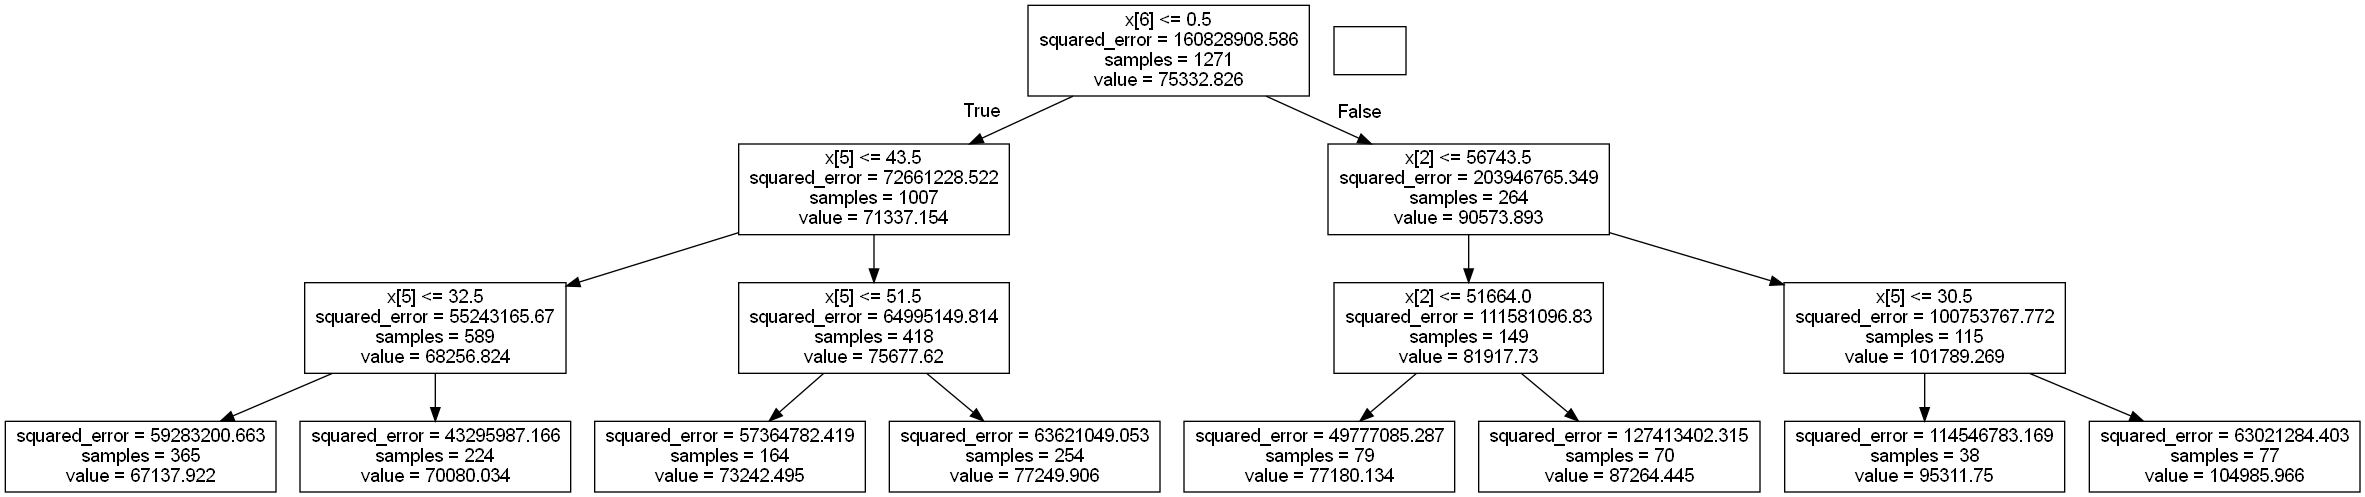

In [85]:
# Export the decision tree for graphical visualization
dot_data = tree.export_graphviz(d_tree_tuned, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree as an image
Image(graph.create_png())

### RandomForest Regressor

In [87]:
# Create Random forest regressor model on default parameters
rf_reg = RandomForestRegressor(n_jobs=-1,max_depth=3,min_samples_split=3)

#Fit model on train data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, min_samples_split=3, n_jobs=-1)

In [88]:
# prediction using test data
rf_reg_pred = rf_reg.predict(X_test)

# Calculate and print the R-squared (r2) score
print("R-squared score: ",r2_score(y_test, rf_reg_pred))

# Calculate and print the Mean Squared Error (MSE)
print("Mean Squared Error: ", mean_squared_error(y_test, rf_reg_pred))

R-squared score:  0.6146846504641297
Mean Squared Error:  57174791.427072465


#### Decision tree and Random Forest with GridSearchCV

##### Decision Tree

In [91]:

# Define the hyperparameters and their possible values
param_grid = {
    # maximum depths
    'max_depth': [2,3,4,5],
    # List minimum samples split for a node
    'min_samples_split': [2,3,4,8,10],
    # List minimum samples leaf for a node
    'min_samples_leaf':[1,2,3,4]
}

# Create a DecisionTreeRegressor
d_tree_gs = tree.DecisionTreeRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(d_tree_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 8, 10]},
             scoring='neg_mean_squared_error')

In [92]:
# Print the best hyperparameters
print("Best parameter: ", grid_search.best_params_)

# Get the best estimator (DecisionTreeRegressor) with the best hyperparameters
best_regtree = grid_search.best_estimator_

# Make predictions Using best estimator  
y_test_pred = best_regtree.predict(X_test)

# Calculate and print the R-squared (R2) scores
print('R-squared scores: ',r2_score(y_test, y_test_pred))

# Calculate and print the Mean Squared Error(MSE)
print('Mean Squared Error: ',mean_squared_error(y_test, y_test_pred))

Best parameter:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10}
R-squared scores:  0.603220439065417
Mean Squared Error:  58875901.69009936


##### RandomForest

In [94]:
# Define the hyperparameters and their possible values
param_grid = {
    # Number of trees
    'n_estimators': [100,200,300],
    # Maximum depth
    'max_depth': [5,10,20,30],
    # Minimum samples split in a node
    'min_samples_split': [3,5,10],
    # Minimum samples required at a leaf node
    'min_samples_leaf': [ 2,4,6],
    # n_jobs
    'n_jobs':[-1]
}

# Create a RandomForestRegressor
rf_gs = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_gs, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-1]},
             scoring='neg_mean_squared_error')

In [95]:
# Print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)

# Get the best estimator (RandomForestRegressor) with the best hyperparameters
best_rf_gs = grid_search.best_estimator_

# Make predictions using best estimator
y_test_pred = best_rf_gs.predict(X_test)

# Calculate and print the R-squared (R2) scores 
print('R-Squared Score: ',r2_score(y_test, y_test_pred))

# Calculate and print the Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(y_test, y_test_pred))

Best parameters:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 300, 'n_jobs': -1}
R-Squared Score:  0.6549018275835277
Mean Squared Error 51207189.263398066


In [96]:
# Convert categorical columns to type 'category'
for col in ['College', 'City']:  # replace with your actual categorical columns
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

# assigning dummy variables
X_train = pd.get_dummies(X_train, columns=['College', 'City'])
X_test = pd.get_dummies(X_test, columns=['College', 'City'])


### XGBoost Regressor

In [98]:
# Create an XGBRegressor
xgb_gs = XGBRegressor(n_estimators=100,max_depth=4,learning_rate=0.1,n_jobs=-1)

# Fit the model on train data
xgb_gs.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [99]:

# Make predictions to test data
y_test_pred = xgb_gs.predict(X_test)

# Calculate and print the R-squared (R2) scores
print('R-Squared Score: ',r2_score(y_test, y_test_pred))

# Calculate and print the Mean Squared Error(MSE)
print('Mean Squared Error: ',mean_squared_error(y_test, y_test_pred))

R-Squared Score:  0.6084101857684381
Mean Squared Error:  58105824.17914116


In [100]:
# Define the hyperparameters and their possible values
param_grid = {
    # Number of boosting rounds
    'n_estimators': [100, 200, 300],
    # Maximum depth 
    'max_depth': [3, 4, 5],
    # Learning rate
    'learning_rate': [0.01, 0.1, 0.2],
    # Minimum sum of instance weight in a child node
    'min_child_weight': [1, 2, 3],
    'n_jobs':[-1]
}

# Create an XGBRegressor
xgb_gs = XGBRegressor()

# Create the GridSearchCV object with R2 scoring
grid_search = GridSearchCV(xgb_gs, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-1]},
             scoring='r2')

In [101]:

# Print the best hyperparameters and corresponding R-squared
print("Best parameters: ", grid_search.best_params_)

# Get the best estimator (XGBRegressor) with the best hyperparameters
best_xgb = grid_search.best_estimator_

# Make predictions using best estimator 
y_test_pred = best_xgb.predict(X_test)

# Calculate and print the R-squared scores
print('R-squared scores', r2_score(y_test, y_test_pred))

# Calculate and print the Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(y_test, y_test_pred))


Best parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 300, 'n_jobs': -1}
R-squared scores 0.6123948657109988
Mean Squared Error 57514559.790390566


## Conclusion :- Random Forest with hyperparameters is the best for prediction of Salary or CTC

After evaluation, the Random Forest Regressor with the hyperparameters ('max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100) is the best performer for predicting the Salary.

1. **R-squared (R^2) Score:** The Random Forest Regressor has the highest R-squared score i.e. 0.6482414405967645 as compared all the models
2. **Mean Squared Error (MSE):** The Random Forest Regressor has the lowest test MSE i.e. 52195486.86755653 as compared to all other models
3. **Tuned**: After tunning it gives the best result

## To further improve the performance of selected model, I can take several steps:
- **Increase the Number of Estimators:**
    
- **Tune Hyperparameters:**
  
- **Feature Scaling:** 